In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (257)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (396)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (313)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (168)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (386)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (543)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (152)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (200)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (204)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fresh cotton plant/dsd (142)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/val/fres

/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (206)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (387)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (326)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (416)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (258)_iaip(1).jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (272)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (265)_iaip(1).jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (516)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (611)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (379)_iaip.jpg
/kaggle/input/cotton-disease-datas

/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (599)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (793)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (892)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (155)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (19)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (530)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (598)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (577)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (376)_iaip.jpg
/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (696)_iaip.jpg
/kaggle/input/cotton-

In [2]:
# Importing Modules
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

In [3]:
image = cv2.imread("/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (776)_iaip.jpg")
type(image)

numpy.ndarray

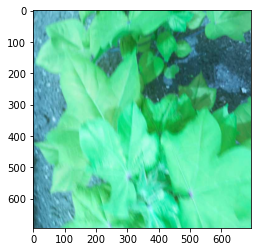

In [4]:
plt.imshow(image)

In [5]:
image_1 = cv2.imread("/kaggle/input/cotton-disease-dataset/Cotton Disease/train/fresh cotton leaf/d (211)_iaip.jpg")

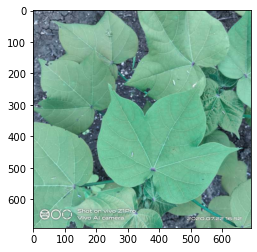

In [6]:
plt.imshow(image_1)

In [7]:
train_path= '../input/cotton-disease-dataset/Cotton Disease/train/'
test_path = '../input/cotton-disease-dataset/Cotton Disease/val/'

In [8]:
import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [9]:
image.shape

(694, 694, 3)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_data = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 64,class_mode = "categorical")
test_data = test_datagen.flow_from_directory(test_path,target_size = (224,224),batch_size = 64,class_mode = "categorical")

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [12]:
# Building Model
model = keras.Sequential([
                          keras.layers.Conv2D(input_shape=(224,224,3),filters = 64,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = "relu"),
                          keras.layers.MaxPool2D(pool_size = (2,2),strides = (2,2)),
                         
                          keras.layers.Conv2D(filters = 128,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 128,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 128,kernel_size = (3,3),activation = "relu"),
                          keras.layers.MaxPool2D(pool_size = (2,2),strides = (2,2)),
                          
                          keras.layers.Conv2D(filters = 256,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 256,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 256,kernel_size = (3,3),activation = "relu"),
                          keras.layers.MaxPool2D(pool_size = (2,2),strides = (2,2)),
                          
                          keras.layers.Conv2D(filters = 512,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 512,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 512,kernel_size = (3,3),activation = "relu"),
                          keras.layers.MaxPool2D(pool_size = (2,2),strides = (2,2)),
                          
                          keras.layers.Conv2D(filters = 512,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 512,kernel_size = (3,3),activation = "relu"),
                          keras.layers.Conv2D(filters = 512,kernel_size = (3,3),activation = "relu"),
                          keras.layers.MaxPool2D(pool_size=(2,2),strides = (2,2)),
                          
                          keras.layers.Flatten(),
                          keras.layers.Dense(4096,activation="relu"),
                          
                          keras.layers.Dense(4096,activation="relu"),
                          
                          keras.layers.Dense(1000,activation="relu"),
                          
                          keras.layers.Dense(4,activation="softmax")
])

In [13]:
# Compiling the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
# Fitting the model
history = model.fit_generator(train_data,validation_data=test_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(test_data))

Epoch 1/5
31/31 [==============================] - 59s 2s/step - loss: 25.7356 - accuracy: 0.3966 - val_loss: 1.4068 - val_accuracy: 0.3083
Epoch 2/5
31/31 [==============================] - 37s 1s/step - loss: 1.3041 - accuracy: 0.4387 - val_loss: 1.3745 - val_accuracy: 0.3083
Epoch 3/5
31/31 [==============================] - 38s 1s/step - loss: 1.3134 - accuracy: 0.4193 - val_loss: 1.3821 - val_accuracy: 0.3083
Epoch 4/5
31/31 [==============================] - 37s 1s/step - loss: 1.3090 - accuracy: 0.4179 - val_loss: 1.3743 - val_accuracy: 0.3083
Epoch 5/5
31/31 [==============================] - 37s 1s/step - loss: 1.3146 - accuracy: 0.4240 - val_loss: 1.3843 - val_accuracy: 0.3083


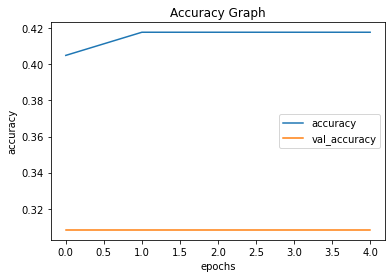

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

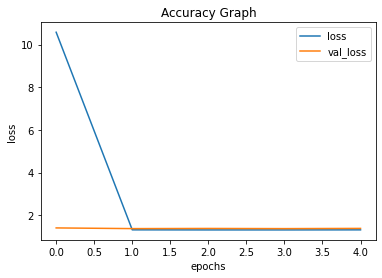

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

Now Using VGG16

In [17]:
# Importing VGG16 from keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [18]:
vgg = VGG16(input_shape=(224,224,3),weights="imagenet",include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [19]:
for layer in vgg.layers:
    layer.trainable=False

In [20]:
from keras.models import Model

In [24]:
x = keras.layers.Flatten()(vgg.output)
x = keras.layers.Dense(512,activation="relu")(x)
x = keras.layers.Dense(512,activation="relu")(x)
prediction = keras.layers.Dense(4,activation="softmax")(x)
model_1 = Model(inputs=vgg.input,outputs=prediction)

In [25]:
# Compiling the model
model_1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
# Fitting the model
history = model_1.fit_generator(train_data,validation_data=test_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(test_data))

Epoch 1/5
31/31 [==============================] - 34s 1s/step - loss: 0.0777 - accuracy: 0.9441 - val_loss: 0.1717 - val_accuracy: 0.8656
Epoch 2/5
31/31 [==============================] - 34s 1s/step - loss: 0.0488 - accuracy: 0.9641 - val_loss: 0.0661 - val_accuracy: 0.9486
Epoch 3/5
31/31 [==============================] - 34s 1s/step - loss: 0.0392 - accuracy: 0.9759 - val_loss: 0.0652 - val_accuracy: 0.9565
Epoch 4/5
31/31 [==============================] - 34s 1s/step - loss: 0.0416 - accuracy: 0.9667 - val_loss: 0.0813 - val_accuracy: 0.9486
Epoch 5/5
31/31 [==============================] - 34s 1s/step - loss: 0.0553 - accuracy: 0.9616 - val_loss: 0.0637 - val_accuracy: 0.9526


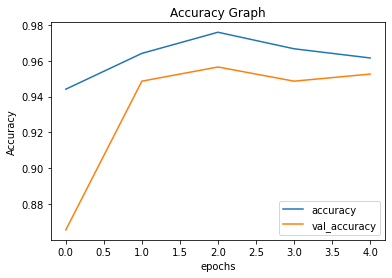

In [31]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["accuracy","val_accuracy"])

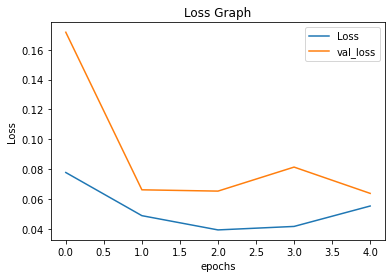

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["Loss","val_loss"])

Learn Everyday :)